# Imports 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import sys
sys.path.append('/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/')
from helpers_locs_to_home import time_2_date
from collections import Counter

from tqdm import tqdm_notebook as tqdmn
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as tkr
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm as tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report



import pickle
import re;pat = re.compile(r'''(-*\d+\.\d+ -*\d+\.\d+);*''');new_geo=[]
import warnings
import seaborn as sns
%matplotlib inline

Reminder: Not running filters based on users.db


/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# SVM

## Location

### Reaal

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

    
for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = SVC()
    param_distributions = {'C': 10**np.random.uniform(low=-5,high=1),
                           'gamma': 10**np.random.uniform(low=-5,high=1),
                           'degree': range(1,4),
                           'kernel': ["linear", "poly", "rbf", "sigmoid"]}
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

### Test

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=1

    
for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = SVC(kernel="rbf",probability=False)
    param_distributions = {'C': 10**np.random.uniform(low=-5,high=1),
                           'gamma': 10**np.random.uniform(low=-5,high=1)}
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.probability=True
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

# AdaBoost

## Location Test

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

    
for i in tqdm(range(1,nb_rep_test+1)):
    stump_clf =  DecisionTreeClassifier(random_state=i, )
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = AdaBoostClassifier(base_estimator = stump_clf)
    param_distributions = {
              "n_estimators": list(range(1,500)),
              "learning_rate": uniform(0.01, 1),
    }
    #
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = 90
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## LinkedIn Test

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

    
for i in tqdm(range(1,nb_rep_test+1)):
    stump_clf =  DecisionTreeClassifier(random_state=i, )
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = AdaBoostClassifier(base_estimator = stump_clf)
    param_distributions = {
              "n_estimators": list(range(1,500)),
              "learning_rate": uniform(0.01, 1),
    }
    #
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = 90
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## Archi

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/archi_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=10

    
for i in tqdm(range(5,nb_rep_test+1)):
    stump_clf =  DecisionTreeClassifier(random_state=i, )
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = AdaBoostClassifier(base_estimator = stump_clf)
    param_distributions = {
              "n_estimators": list(range(1,500)),
              "learning_rate": uniform(0.01, 1),
    }
    #
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

# RForest

## Location

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report


d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = RandomForestClassifier(n_estimators=1000, n_jobs=1)
    param_distributions = {'criterion': ['gini', 'gini', 'entropy'],
                           'max_depth': range(2,50),
                           'min_samples_split': uniform(loc=0, scale=0.2),
                           'min_samples_leaf': uniform(loc=0, scale=0.2),
                           'bootstrap': [True, True, False]}
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## LinkedIn

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report


d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = RandomForestClassifier(n_estimators=1000, n_jobs=1)
    param_distributions = {'criterion': ['gini', 'gini', 'entropy'],
                           'max_depth': range(2,50),
                           'min_samples_split': uniform(loc=0, scale=0.2),
                           'min_samples_leaf': uniform(loc=0, scale=0.2),
                           'bootstrap': [True, True, False]}
    n_splits = 5
    n_repeats = 5
    n_iter = 500
    n_jobs = 90
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## Archi

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm as tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/archi_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=10

for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = RandomForestClassifier(n_estimators=1000, n_jobs=1)
    param_distributions = {'criterion': ['gini', 'gini', 'entropy'],
                           'max_depth': range(2,50),
                           'min_samples_split': uniform(loc=0, scale=0.2),
                           'min_samples_leaf': uniform(loc=0, scale=0.2),
                           'bootstrap': [True, True, False]}
    #
    n_splits = 5
    n_repeats = 10
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

# XGBoost

## Location

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report


d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

for i in tqdm(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic', nthread=1,scale_pos_weight=1, base_score=0.5)
    #
    param_distributions = {"max_depth": range(3,50),
                           "learning_rate": uniform(loc=0, scale=0.1),
                           "n_estimators": range(10, 1500),
                           "min_child_weight": range(1, 200),
                           "gamma": uniform(loc=0, scale=0.1),
                           "subsample": uniform(loc=0.7, scale=0.3),
                           "colsample_bytree": uniform(loc=0.5, scale=0.5),
                           "colsample_bylevel": uniform(loc=0.1, scale=0.9), 
                           "reg_alpha": uniform(loc=0, scale=0.2),
                           "reg_lambda": uniform(loc=0.8, scale=0.2)}
    #
    n_splits = 5
    n_repeats = 10
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

In [5]:
clf_xgb_best = XGBClassifier(silent=True,
                             objective='binary:logistic', nthread=1,
                             colsample_bylevel=0.7644347319502035,
                             colsample_bytree=0.5407410007880673,
                             gamma=0.06575869277016731,
                             learning_rate=0.007273150630348446,
                             max_depth=8,
                             min_child_weight=28,
                             n_estimators=1272,
                             reg_alpha=0.1689331019058065,
                             reg_lambda=0.8009806043156956,
                             subsample=0.7642669507003719,
                             scale_pos_weight=1, base_score=0.5,
                            n_jobs=10)

clf_xgb_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.7644347319502035,
       colsample_bytree=0.5407410007880673, gamma=0.06575869277016731,
       learning_rate=0.007273150630348446, max_delta_step=0, max_depth=8,
       min_child_weight=28, missing=None, n_estimators=1272, n_jobs=10,
       nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0.1689331019058065, reg_lambda=0.8009806043156956,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7642669507003719)

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_xgb_best.predict(X_test)))

             precision    recall  f1-score   support

          0       0.66      0.61      0.64       752
          1       0.63      0.68      0.66       738

avg / total       0.65      0.65      0.65      1490



/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## LinkedIn

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=5

for i in tqdmn(range(1,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic', nthread=1,scale_pos_weight=1, base_score=0.5)
    #
    param_distributions = {"max_depth": range(3,50),
                       "learning_rate": uniform(loc=0, scale=0.1),
                       "n_estimators": range(10, 1500),
                       "min_child_weight": range(1, 200),
                       "gamma": uniform(loc=0, scale=0.1),
                       "subsample": uniform(loc=0.7, scale=0.3),
                       "colsample_bytree": uniform(loc=0.5, scale=0.5),
                       "colsample_bylevel": uniform(loc=0.1, scale=0.9),
                       "reg_alpha": uniform(loc=0, scale=0.2),
                       "reg_lambda": uniform(loc=0.8, scale=0.2)}
    #
    n_splits = 5
    n_repeats = 10
    n_iter = 500
    n_jobs = -1
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## Archi

In [ ]:
import pickle
from operator import itemgetter
from collections import defaultdict, Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer, StandardScaler, scale
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, brier_score_loss, make_scorer, f1_score, fbeta_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from scipy.stats import uniform
from xgboost import XGBClassifier
from tqdm import tqdm as tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

import pickle
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/archi_xgb_data.p","rb"))

X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

dic_res={"best_params":[],"best_score":[],"auc":[],"fpr":[],"tpr":[],"threshold":[]}
nb_rep_test=10

for i in tqdm(range(8,nb_rep_test+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic', nthread=1,scale_pos_weight=1, base_score=0.5)
    #
    param_distributions = {"max_depth": range(3,50),
                       "learning_rate": uniform(loc=0, scale=0.1),
                       "n_estimators": range(10, 1500),
                       "min_child_weight": range(1, 200),
                       "gamma": uniform(loc=0, scale=0.1),
                       "subsample": uniform(loc=0.7, scale=0.3),
                       "colsample_bytree": uniform(loc=0.5, scale=0.5),
                       "colsample_bylevel": uniform(loc=0.1, scale=0.9),
                       "reg_alpha": uniform(loc=0, scale=0.2),
                       "reg_lambda": uniform(loc=0.8, scale=0.2)}
    #
    n_splits = 5
    n_repeats = 10
    n_iter = 500
    n_jobs = 25
    verbose = 1
    #
    cv_xgb = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    scorer_xgb = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
    model_xgb = RandomizedSearchCV(clf_xgb, param_distributions, n_iter=n_iter,
                                   scoring=scorer_xgb, n_jobs=n_jobs, cv=cv_xgb, verbose=verbose)
    #
    model_xgb.fit(X_train, y_train)
    print("Best model parameters: ", model_xgb.best_params_)
    print("Best model roc auc score: ", model_xgb.best_score_)
    #
    #Mira brunch
    clf_xgb_best=model_xgb.best_estimator_
    clf_xgb_best.fit(X_train,y_train)
    #
    probs = clf_xgb_best.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    dic_res["best_params"].append(model_xgb.best_params_)
    dic_res["best_score"].append(model_xgb.best_score_)
    dic_res["fpr"].append(fpr)
    dic_res["tpr"].append(tpr)
    dic_res["threshold"].append(threshold)
    dic_res["auc"].append(roc_auc)

## Get Average Performances

In [51]:
class_rep_location=[]
import pickle
d_test_res=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/dic_res_location_xgb.p","rb"))
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/uksoc_xgb_data.p","rb"))

nb_rep=len(d_test_res["auc"])
X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

for i in tqdmn(range(1,nb_rep+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
    clf_xgb = XGBClassifier(silent=True, objective='binary:logistic',
                        nthread=1,scale_pos_weight=1, base_score=0.5)
    clf_xgb.set_params(**d_test_res["best_params"][i-1])
    clf_xgb.fit(X_train,y_train)
    class_rep_location.append(report2dict(classification_report(y_test,clf_xgb.predict(X_test))))
    

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty ar

/home/jlevyabi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Extension of Results

In [5]:
import pickle
class_rep_linkedin=[]
d_test_res=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/icdm18/issues/dic_res_linkedin_xgb.p","rb"))
d_test_brunch=pickle.load(open("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/xgb_data.p","rb"))

nb_rep=len(d_test_res["auc"])
X_train=d_test_brunch["Xtrain"]
X_test=d_test_brunch["Xtest"]
y_train=d_test_brunch["Ytrain"]
y_test=d_test_brunch["Ytest"]

X=np.vstack([X_train,X_test])
y=np.hstack([y_train,y_test])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=i)
clf_xgb = XGBClassifier(ssilent=True, objective='binary:logistic',nthread=1,scale_pos_weight=1, base_score=0.5)
clf_xgb.set_params(**d_test_res["best_params"][i-1])
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.8712628703779456,
       colsample_bytree=0.6373396139836389, gamma=0.09388633791874443,
       learning_rate=0.014176633307010956, max_delta_step=0, max_depth=22,
       min_child_weight=1, missing=None, n_estimators=932, n_jobs=1,
       nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0.06001868382785929, reg_lambda=0.9025438788675183,
       scale_pos_weight=1, seed=None, silent=True, ssilent=True,
       subsample=0.7051511417421399)

In [48]:
vocab=list(n_grams_tweet_vect.vocabulary_.values())
topics=list(dic_topics.values())

In [62]:
plot_topc_imp=[(i,val,clf_xgb.feature_importances_[1000+i]) for i,val in enumerate(topics) if not("Sth" in val)]

In [65]:
sorted_importance_topics = sorted(plot_topc_imp, key=lambda tup: tup[2],reverse=True)

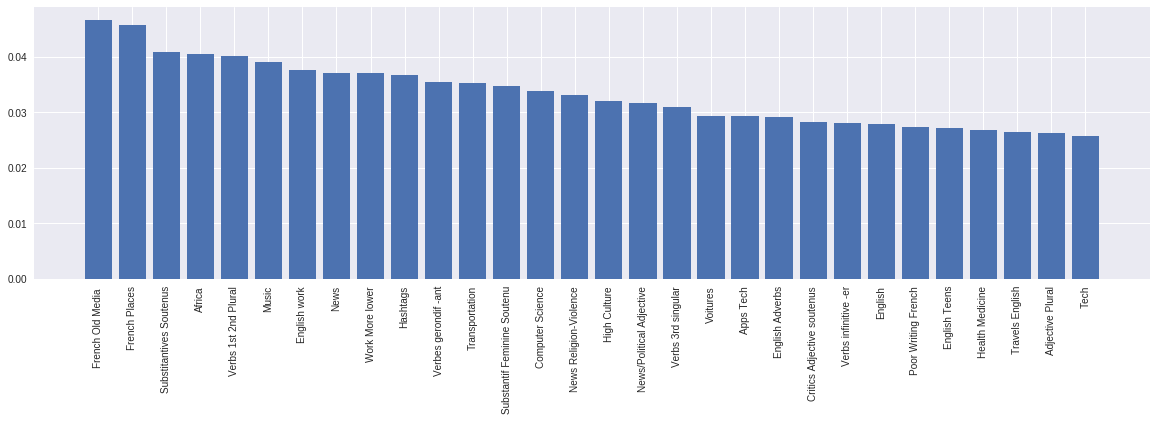

In [70]:
plt.figure(figsize=(20,5))
nb=30
dat_x=np.array([a[-1] for a in sorted_importance_topics])[:nb]
plt.bar(x=np.arange(len(dat_x)),height=dat_x/np.sum(dat_x));
plt.xticks(np.arange(len(dat_x)), [a[1]for a in sorted_importance_topics][:nb], rotation=90);

# Helpers

In [12]:
import unidecode,re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter
from tqdm import tqdm 

#N-Gram vectorizer
french_stopwords = list(set(stopwords.words('french')))
eng_stopwords = list(set(stopwords.words('english')))
linkedin_tweets=pd.read_csv("/warehouse/COMPLEXNET/jlevyabi/TWITTERSES/ml_soc_econ/data_files/UKSOC_rep/linkedin/linkedin_data/all_linkedin_users.csv",
                            sep=';',header=0,)
usr_text=(linkedin_tweets.dropna(how="any").drop(["tweet_id","tweet_date"],axis=1).groupby(
    'user_id',squeeze=True,)['tweet_text'].apply(lambda x: "%s" % ' '.join(x))).to_frame()
usr_text.reset_index(inplace=True)
nbt=(linkedin_tweets.dropna(how="any").drop(["tweet_id","tweet_date"],axis=1).groupby(
    'user_id',squeeze=True,)['tweet_text'].apply(lambda x: len(x))).to_frame().values
usr_text["nb_tweets"]=[y[0] for y in nbt]


d100=pickle.load(open("/home/jlevyabi/seacabo/data_files/spec_corrected_clusters_only_pos_entries_100.p","rb"))
def get_cluster_info(dic_clus,df_tweets):
    nb_clusters=len(list(dic_clus.keys()))
    word2cluster_only_pos={word:cluster_nb for cluster_nb,cluster_words in dic_clus.items() for word in cluster_words}
    clust_freq_only_pos=[]
    for tweet in tqdm(df_tweets.tweet_text):
        clust_freq_only_pos.append((Counter([word2cluster_only_pos[word]
                                             for word in tweet.split() if word in word2cluster_only_pos])))
    cfd_only_pos=[{k:(v+0.0)/(sum(dic_count.values()))for k,v in dic_count.items()}
                  for dic_count in clust_freq_only_pos]
    df_tweets["cfd_%d"%nb_clusters]=[np.array(list({clus:(dic_count[clus] if clus in dic_count else 0)
                                    for clus in range(len(dic_clus))}.values())) for dic_count in cfd_only_pos]
    return (df_tweets)

usr_text=get_cluster_info(d100,usr_text);

#Tweet Information: N-grams
n_grams_tweet_vect=TfidfVectorizer(stop_words=french_stopwords+eng_stopwords,
                                 max_features=1000,ngram_range=(1,2),
                                lowercase=True)
mat_n_grams_tweet=n_grams_tweet_vect.fit_transform(list(usr_text.tweet_text.values)).todense()



100%|██████████| 3568/3568 [00:09<00:00, 358.12it/s]


In [20]:
# d100 topic per cluster information
dic_topics={2:"Music",
4:"Computer Science",
11:"English",
12:"News",
13:"Games",
14:"Verbes gerondif -ant",
15: "Health Medicine",
16: "Verbs infinitive -er,ir",
17: "SportSoccer",
18: "Travels English",
19: "Catalan - Spanish Independence",
20: "News Religion-Violence",
21:"Movies",
23: "Personal Adjectives",
24: "Hashtags",
25: "Substantives",
26: "Verbs 3rd plural",
27: "Work More lower",
28: "Verbs Imparfait",
29: "Adjective Singular Feminine",
30: "Substitantives Soutenus",
31:"Arab",
32:"Turk",
33:"French Old Media ",
34: "Arab Names",
35: "Adjective Plural",
36: "Verbs 3rd singular",
37: "Verbs infinitive -er",
38: "English work",
39: "American English Media Personalities",
40: "Modern Music",
41: "Español",
43: "International News Middle East Centered" ,
44: "News/Political Adjective",
45: "Childish writing" ,
46: "Porn",
47: "French Places",
48: "Non Standard adjectives",
49: "Verbs 1st 2nd Plural",
50: "Soccer Players",
51:"English sport NBA UFC Ligue 1",
52:"Music related" ,
54:"Actresses",
55: "Tech",
56: "Sport Bike Tennis",
57: "Feminine Substantif",
58: "American TV Shows",
59: "Substantif Feminine Soutenu",
60: "English Adverbs",
61:"Verbs 2nd singular",
62:"Clothes",
63:"Africa",
64:"Tourism France",
65: "English Teens",
66: "Anime Teen Media Characters",
67: "French Soccer",
68: "French Politics",
70: "Portuguese Italian",
71:"Food",
72:"Poor Writing French",
74:"Critics Adjective soutenus",
75: "German",
76: "Soccer Hashtags",
78:" French Media",
79: "Poor abbreviations",
81:"Lyceens",
82:"English News",
83:"Poor Onomatopeyas",
85: "Voitures",
86: "Poor Verbs",
90: "Apps Tech",
94:"High Culture",
95: "Transportation",
96: "Arab_other",
97: "Descriptors",
99: "Games_other"}

iti=0
for j in range(100):
    if not(j in dic_topics):
        dic_topics[j]="Sth"+str(iti)
        iti+=1

dic_topics={k:dic_topics[k] for k in range(100)}

In [6]:
def report2dict(cr):
    # Parse rows
    tmp = list()
    for row in cr.split("\n"):
        parsed_row = [x for x in row.split("  ") if len(x) > 0]
        if len(parsed_row) > 0:
            tmp.append(parsed_row)
    
    # Store in dictionary
    measures = tmp[0]

    D_class_data = defaultdict(dict)
    for row in tmp[1:]:
        class_label = row[0]
        for j, m in enumerate(measures):
            D_class_data[class_label][m.strip()] = float(row[j + 1].strip())
    return D_class_data